In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
data = pd.read_csv('../covtype.data', header=None)

columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]
wilderness_areas = [f'Wilderness_Area_{i}' for i in range(1, 5)]
soil_types = [f'Soil_Type_{i}' for i in range(1, 41)]
columns.extend(wilderness_areas)
columns.extend(soil_types)
columns.append('Cover_Type')
data.columns = columns
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [59]:
cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points', 'Cover_Type']

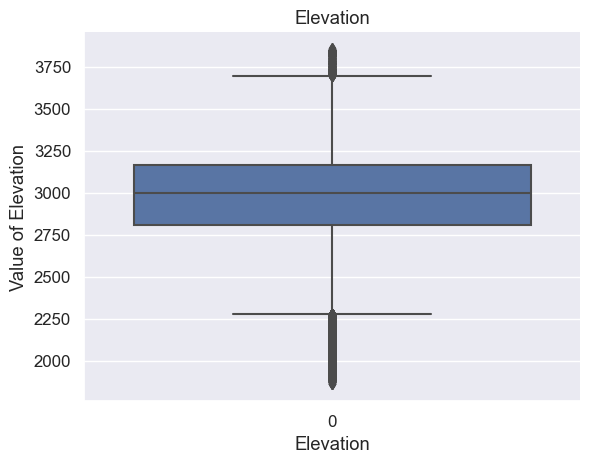

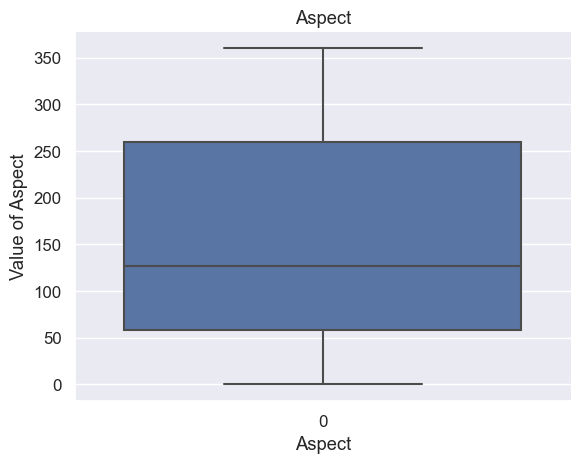

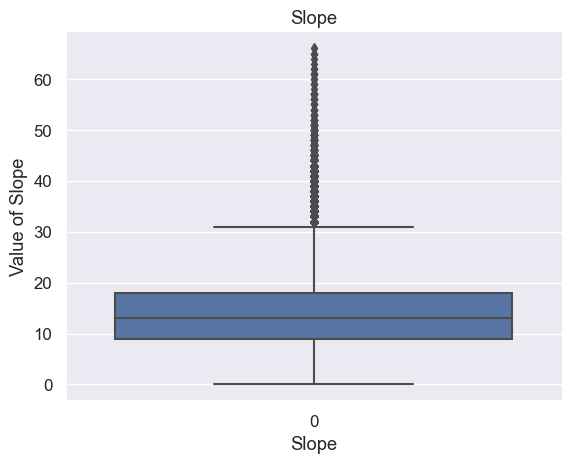

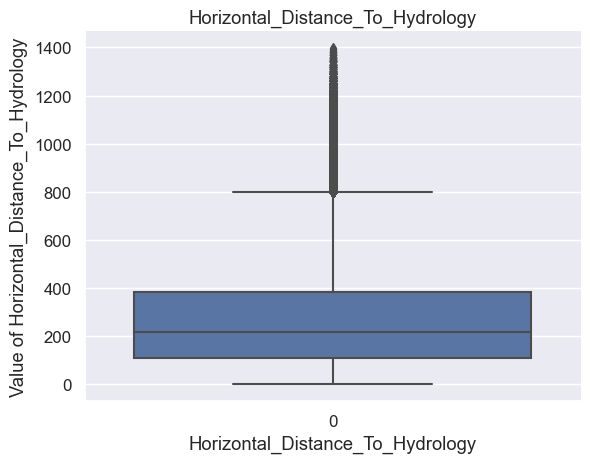

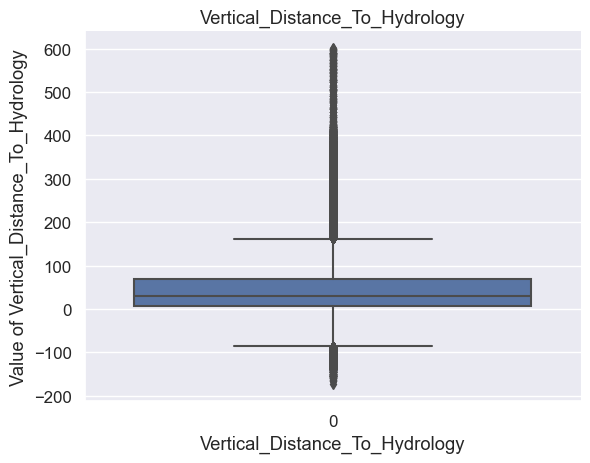

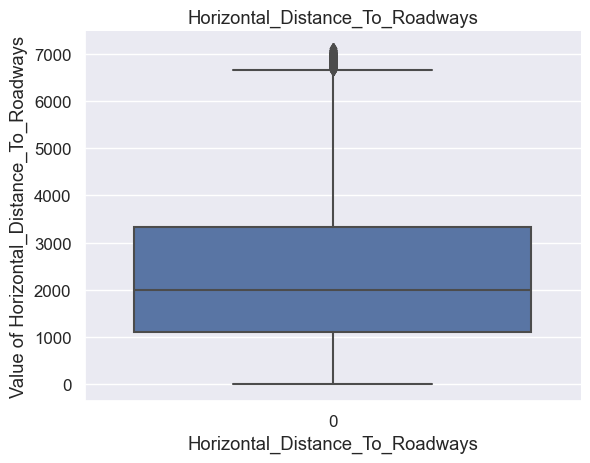

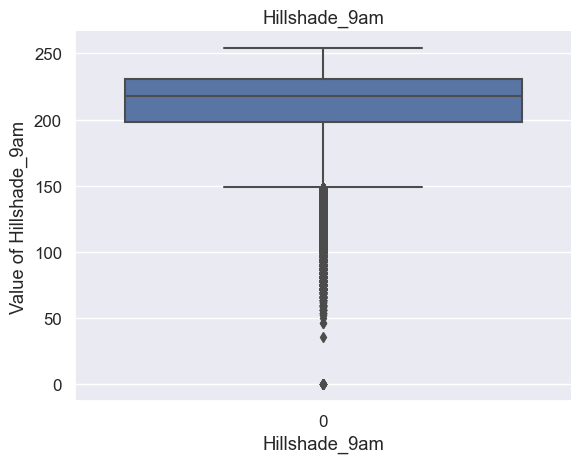

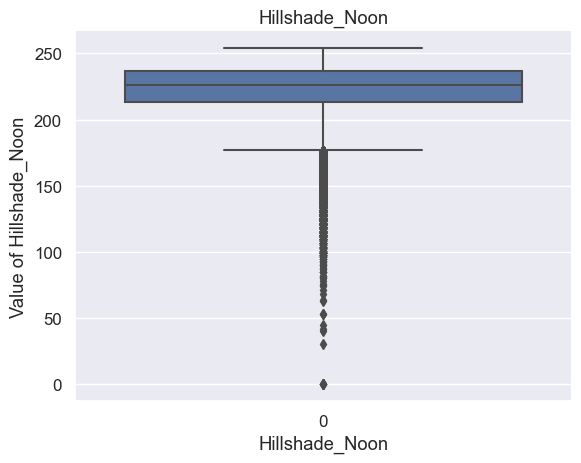

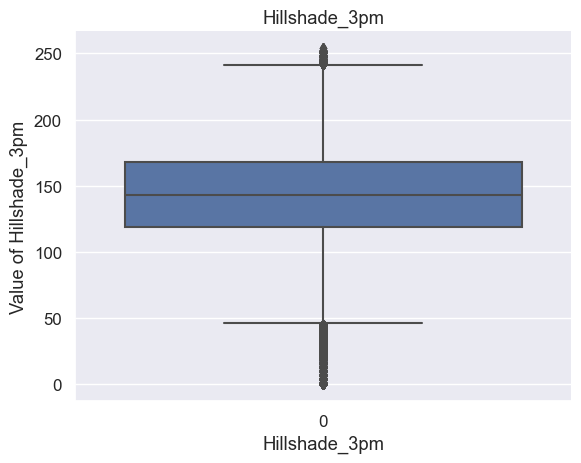

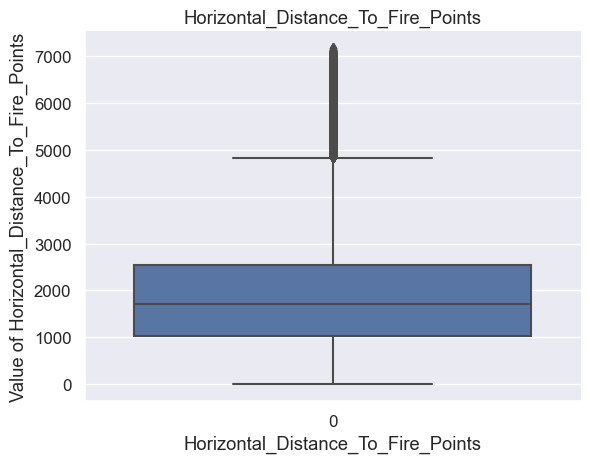

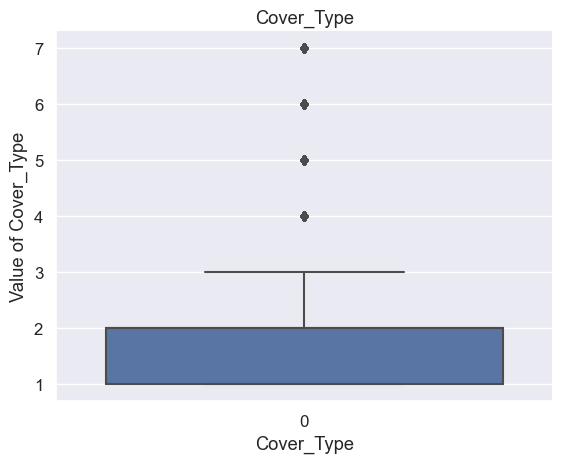

In [60]:
for i, column in enumerate(cols):
    fig, ax = plt.subplots()
    sns.boxplot(data=data[column], ax=ax).set(title=f"{column.upper()} boxplot", xlabel=f"{column}", ylabel=f"Value of {column}")
    ax.set_title(column)
    sns.despine()
    plt.show()

In [61]:
# Calculate the z-scores of each column - measure that represents the number of standard deviations a data point is from the mean of the dataset
z_scores = (data - data.mean()) / data.std()
# Set the threshold for the z-score
threshold = 3
# Remove any rows where the z-score is greater than the threshold
data = data[(np.abs(z_scores) < threshold).all(axis=1)]

# Interquartile Range (IQR)
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [62]:
print(len(data))

107905


<AxesSubplot:>

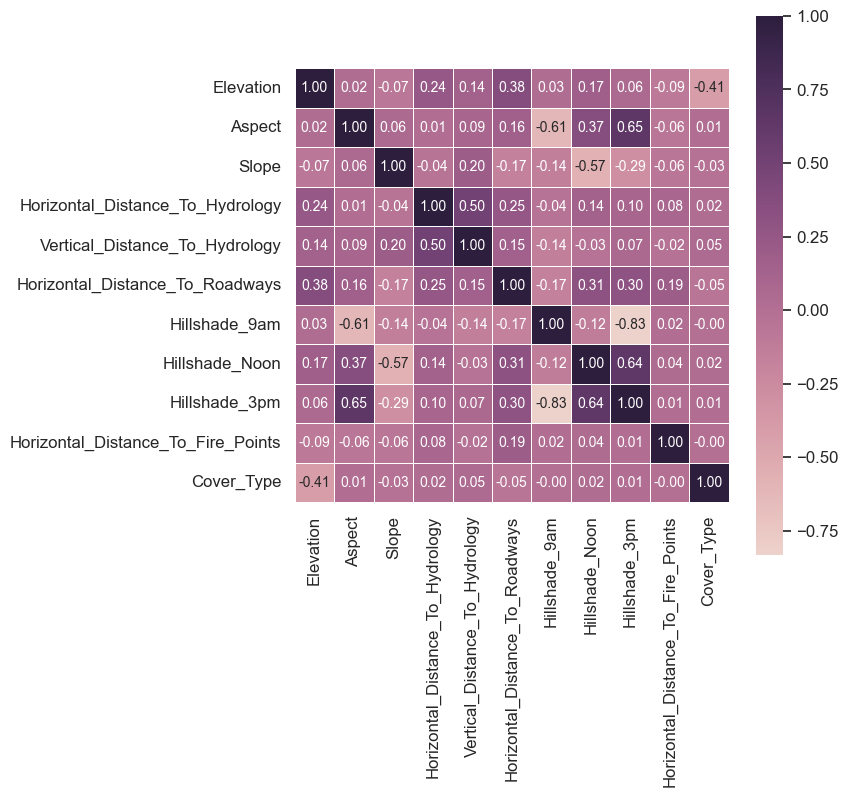

In [63]:
data_subset = data[cols]
correlation_matrix = np.corrcoef(data_subset.values.T)

fig, ax = plt.subplots(figsize=(7, 7))
sns.set(font_scale=1.1)
sns.heatmap(data=correlation_matrix, square=True, cbar=True, annot=True, annot_kws={'size': 10}, xticklabels=cols, yticklabels=cols, fmt=".2f", linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("Cover_Type", axis=1), data["Cover_Type"], test_size=0.2)

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(7, activation="softmax")
])

In [67]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [68]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2159/2159 [==============================] - 5s 2ms/step - loss: 0.5474 - accuracy: 0.7450 - val_loss: 0.4983 - val_accuracy: 0.7613
Epoch 2/10
2159/2159 [==============================] - 5s 2ms/step - loss: 0.4847 - accuracy: 0.7731 - val_loss: 0.4726 - val_accuracy: 0.7789
Epoch 3/10
2159/2159 [==============================] - 5s 2ms/step - loss: 0.4616 - accuracy: 0.7873 - val_loss: 0.4496 - val_accuracy: 0.7922
Epoch 4/10
2159/2159 [==============================] - 4s 2ms/step - loss: 0.4434 - accuracy: 0.7969 - val_loss: 0.4357 - val_accuracy: 0.8005
Epoch 5/10
2159/2159 [==============================] - 5s 2ms/step - loss: 0.4283 - accuracy: 0.8054 - val_loss: 0.4185 - val_accuracy: 0.8114
Epoch 6/10
2159/2159 [==============================] - 5s 2ms/step - loss: 0.4157 - accuracy: 0.8111 - val_loss: 0.4067 - val_accuracy: 0.8190
Epoch 7/10
2159/2159 [==============================] - 4s 2ms/step - loss: 0.4056 - accuracy: 0.8166 - val_loss: 0.4014 - val_accuracy: